In [1]:
from math import gcd
from qiskit import execute
from qiskit_aer import Aer

from shor import ShorAlgorithm

In [2]:
shor = ShorAlgorithm()

In [3]:
number = 35

Numbers that won't produce nontrivial factor with `gcd()`.

In [4]:
gcd_results = [(i,gcd(i,number)) for i in range(2,number)]
list_of_numbers = [tp[0] for tp in gcd_results if tp[1] == 1]
print(list_of_numbers)

[2, 3, 4, 6, 8, 9, 11, 12, 13, 16, 17, 18, 19, 22, 23, 24, 26, 27, 29, 31, 32, 33, 34]


In [5]:
a = 3
num_qubits_qft = 8
shots = 8192

In [6]:
qc = shor.quantum_circuit(number=number, a=a, num_qubits_qft=num_qubits_qft)

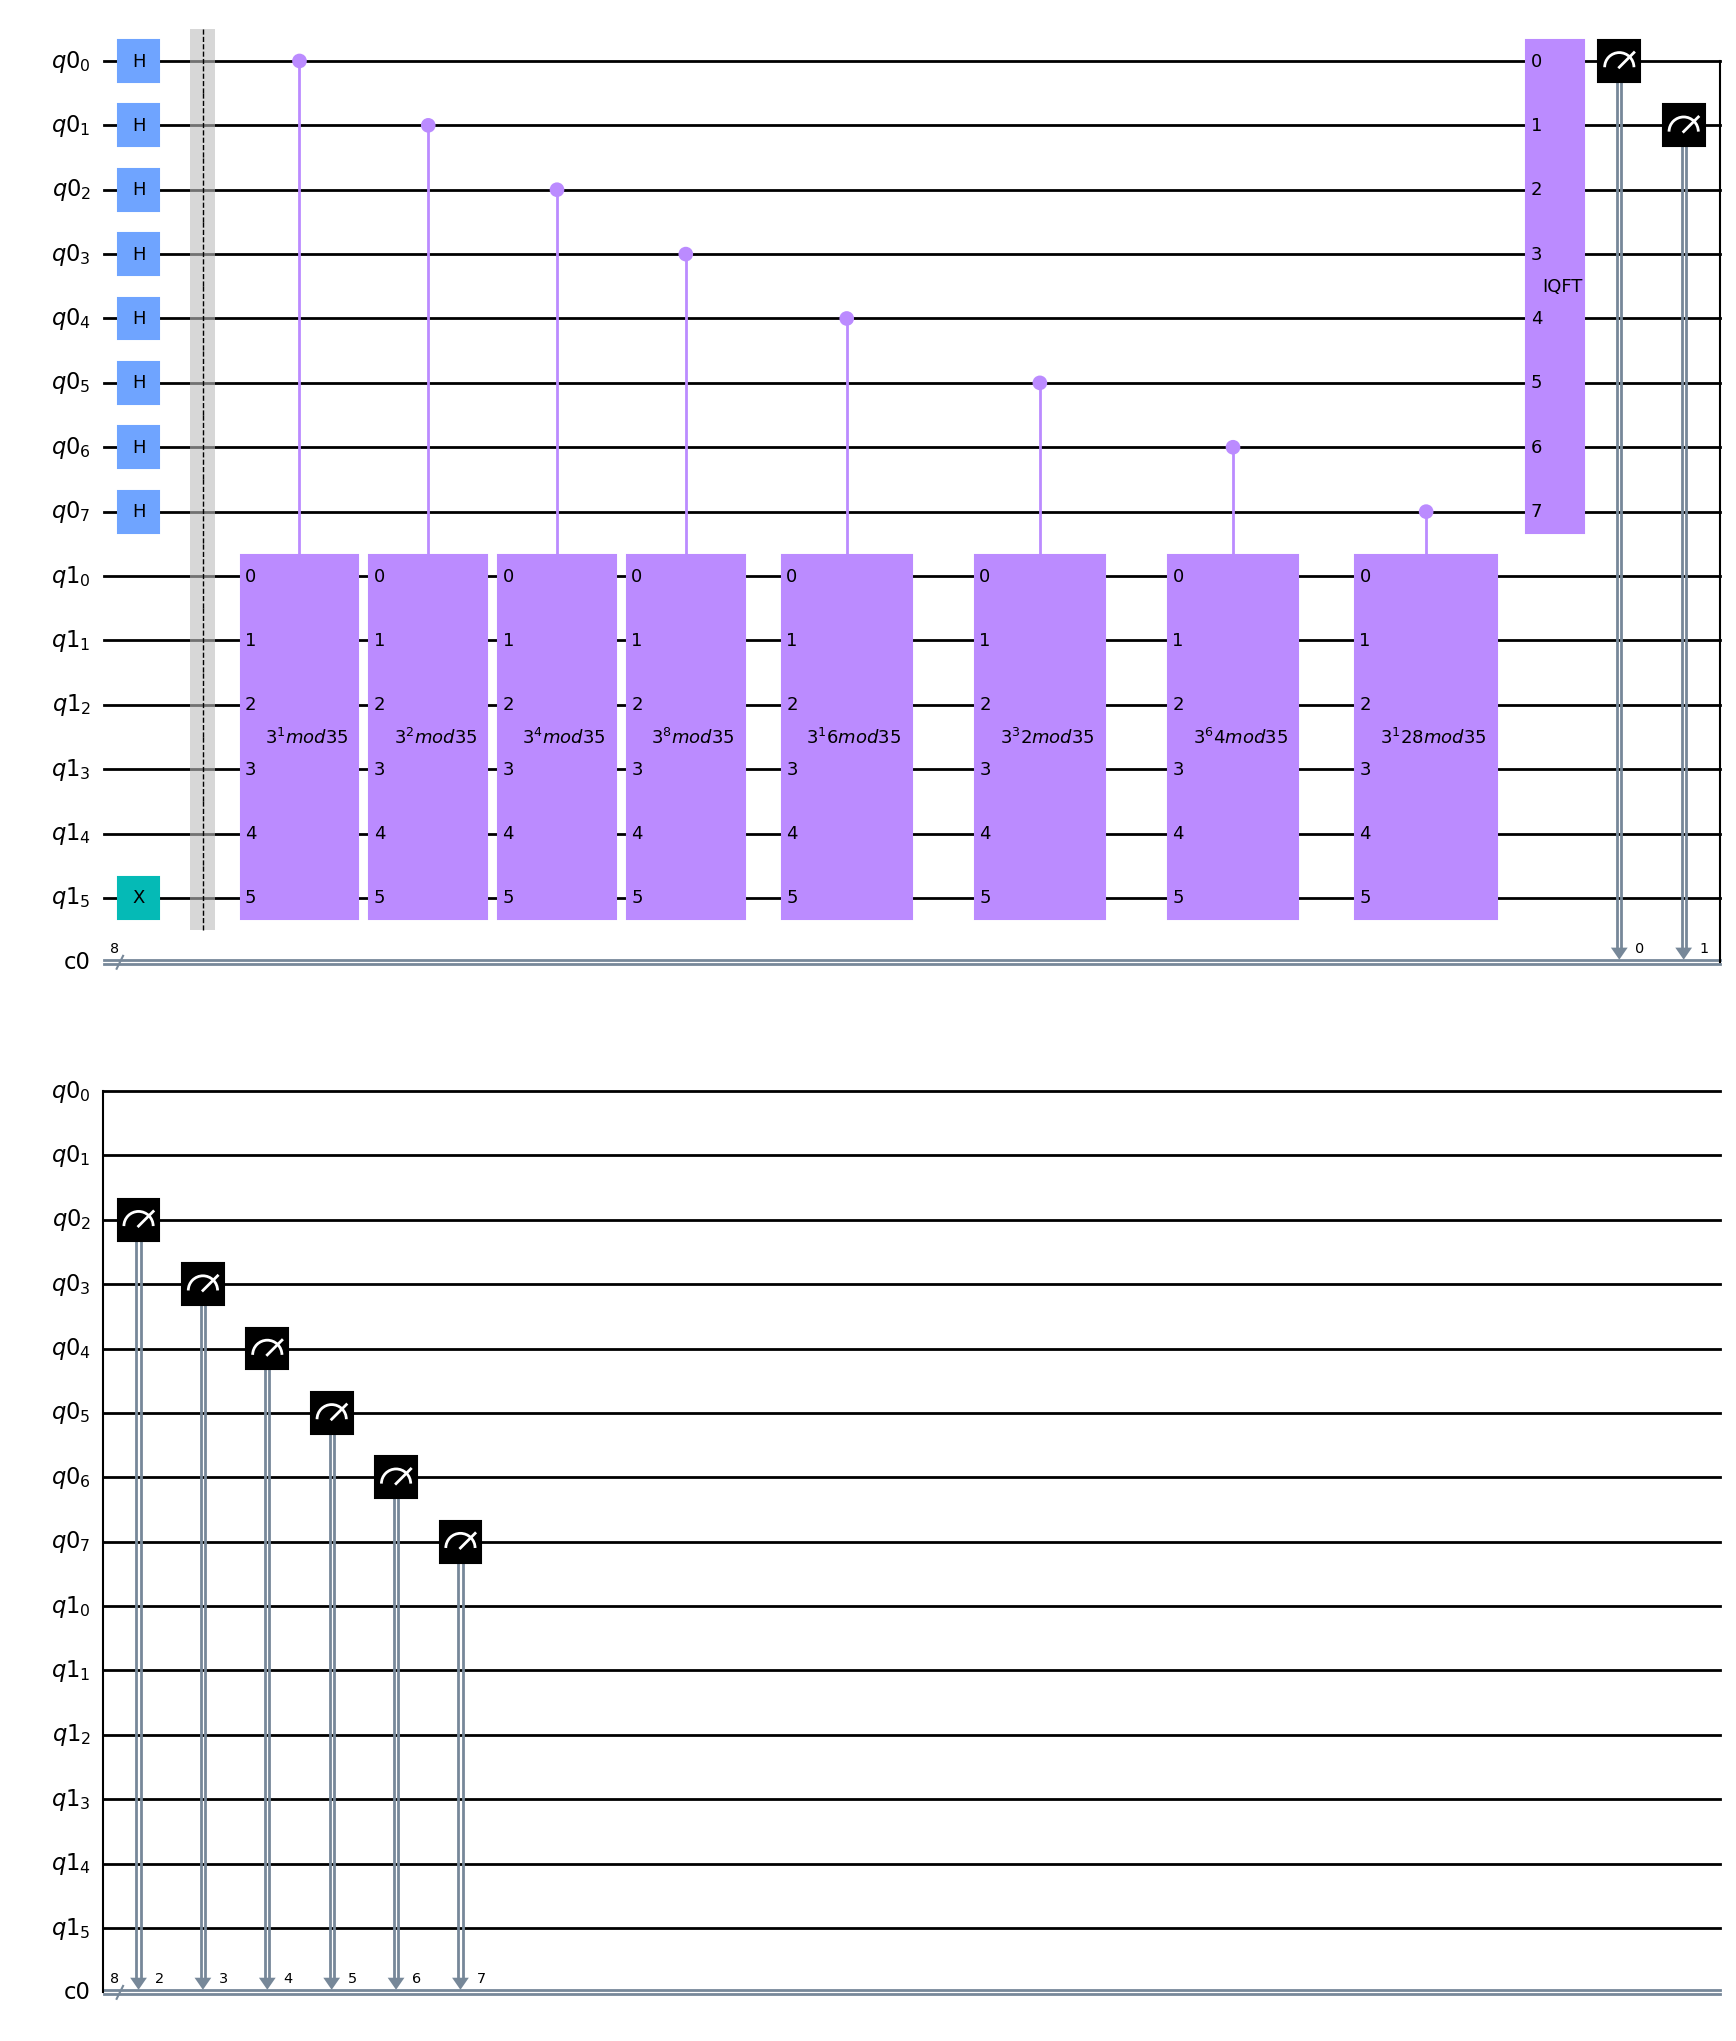

In [7]:
qc.draw(output="mpl")

In [8]:
number = 35

In [9]:
factors = shor.get_number_prime_factors(number=number, num_qubits_qft=num_qubits_qft, shots=shots)

In [10]:
factors

(5, 7)